# 回帰分析について真剣に考える。
- データ揃えて、ヤー！っと分析していたけど、データの分布とか確かめつつ、根拠を持って回帰モデルを作れればと思っています。
- とりあえず、ロジスティック回帰に無理やり当てはめることを考えて、多分どっかで無理があるんだと思いますが、どこに無理があるのかを考えていきたいと思います。
- 統計モデリングの第一歩は、「ばらつきのあるデータは、何か確率分布から発生したと考えれば扱いやすいな」と考えることだそうです。
- データ解析のための統計モデリング入門を参考にしています。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/train.csv')

- 被説明変数は0〜9の手書き文字
- 説明変数は各pixelでの色の濃さ（0〜255）

意味なさげだけど、とりあえずlabelの統計量と、ヒストグラムを作成

In [4]:
#統計量
data.iloc[:,0].describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

今回の場合、ラベルの統計量って多分意味ないね。

- 関心があるのは、各pixcelが特定の値を持った時にラベルがある特定の数字になる確率。
- 例）pixel1が255で、その他のpixelがすべて0の時ラベルが1になる確率
- 特徴量がいっぱいあると頭が溶けそうになるので、図示したいということで、pixel210だけで考えます。そんで、最後に特徴量増やします。

In [5]:
X = data[['pixel210']]
y = data[['label']]

In [6]:
#説明変数の統計量
X.describe()

,pixel210
count,42000.000000
mean,133.590810
std,110.569713
min,0.000000
25%,0.000000
50%,152.000000
75%,253.000000
max,255.000000


- 説明変数と被説明変数の関係

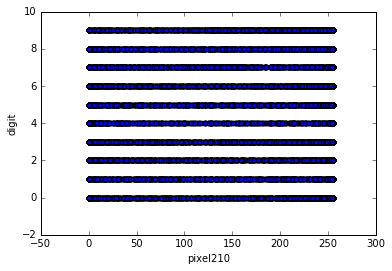

In [8]:
plt.scatter(X,y)
plt.xlabel('pixel210')
plt.ylabel('digit')
plt.show()

- 無謀だということはわかっています。はい。
- ある人が書いた文字がjであると（ある人が書いた文字はjである確率は？）を統計モデルにしようと考えて、（本当は選択しないけど）二項分布を使ったモデル化を考える。
$$p(y|N,q) = \left( \begin{array}{c} N \\ y \end{array} \right) q^{y}(1-q)^{N-y}$$

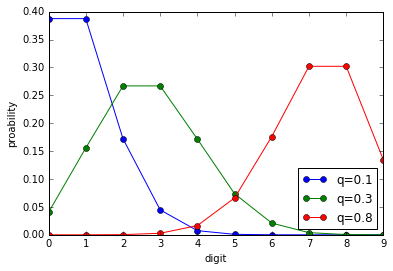

In [21]:
from scipy.stats import binom
x = np.arange(0,10,1)
plt.plot(x,binom.pmf(x,9,0.1),'o-',label='q=0.1')
plt.plot(x,binom.pmf(x,9,0.3),'o-',label='q=0.3')
plt.plot(x,binom.pmf(x,9,0.8),'o-',label='q=0.8')
plt.legend(loc='best')
plt.xlabel('digit')
plt.ylabel('proability')
plt.show()

- 隣の数字が似ていて、離れると似ていないというわけではないのでこの確率分布っておかしいですよね。
- そもそも、生起確率という概念が当てはまらないよね。
- というか、目的変数がそもそも確率変数では無いですよね。いやはやすでに混乱気味

- そして気づいた、二項分布じゃなくて多項分布を使ったロジスティック回帰で考えないといけないらしいです。
- ということで、撤退。